# 1. Plotting categorical variables

Text(0.5, 0.98, 'Categorical Plotting')

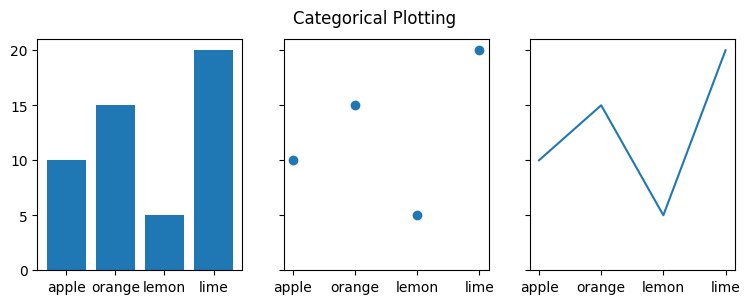

In [1]:
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize = (9, 3), sharey = True) # sharey: y축 공유
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting') # 전체 그림 제목

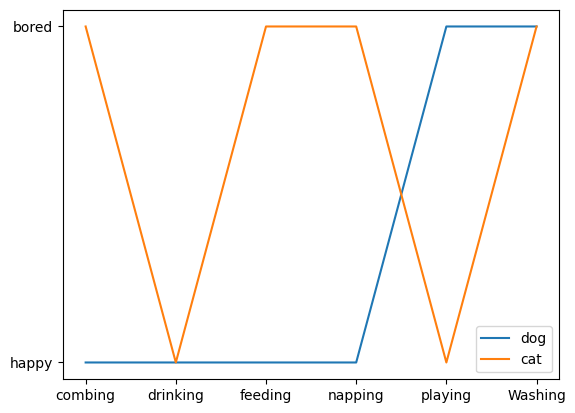

In [2]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "Washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label = "dog")
ax.plot(activity, cat, label = "cat")
ax.legend()

plt.show()

# 2. Plotting the coherence of two signals

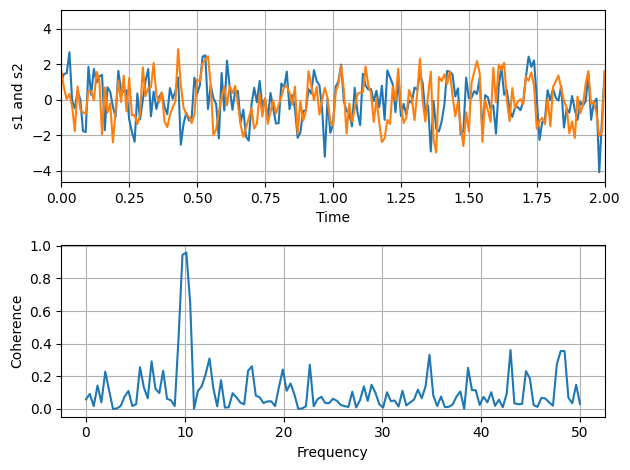

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801) # 난수 발생을 위한 시드값을 설정

dt = 0.01 # 시간 간격
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t)) # 표준 정규 분포에서 추출한 난수
nse2 = np.random.randn(len(t))

# Two signals with a coherent part at 10 Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True) # 첫 번째 서브플롯에 그리드 표시

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt) # cohere(): 일관성 값과 대응하는 주파수 배열 반환
axs[1].set_ylabel('Coherence')

fig.tight_layout() # 그림의 레이아웃을 조정
plt.show()

# 3. CSD Demo

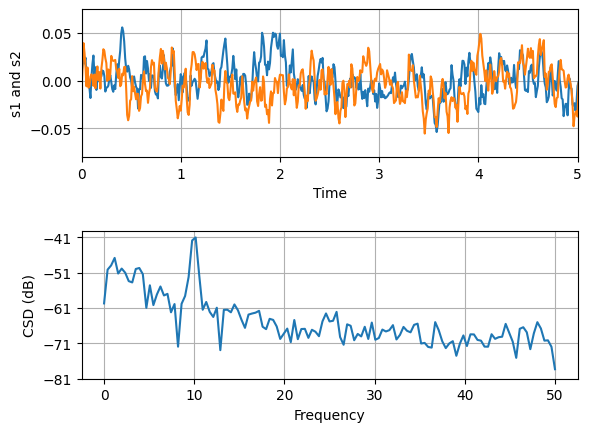

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace = 0.5) # 서브플롯 간의 간격을 늘림, hspace: 수직 간격

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)

nse1 = np.random.randn(len(t))
nse2 = np.random.randn(len(t))
r = np.exp(-t / 0.05) # 지수 함수 값을 계산, 감쇠 계수 배열 생성

cnse1 = np.convolve(nse1, r, mode = 'same') * dt # 합성한 신호 생성
cnse2 = np.convolve(nse2, r, mode = 'same') * dt

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('Time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1 / dt) # 십자 스펙트럼을 계산하여 그림, CSD와 대응하는 주파수 배열 반환
ax2.set_ylabel('CSD (dB)')
plt.show()

사용할 수 있는 시나리오
- 시계열 데이터 분석
- 신호 처리
- 잡음 제거 및 필터링

# 4. Curve with error band

[None]

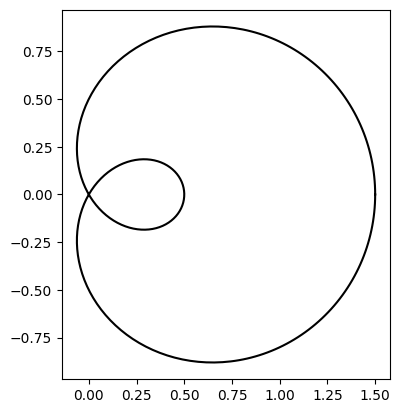

In [5]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect = 1) # 가로와 세로 비율을 동일하게 맞추어 원의 원형을 유지, aspect: 1로 설정하여 가로와 세로의 비율을 1:1로 맞춤

**from matplotlib.path import Path**: Path는 다각형과 곡선 등의 기하학적 도형을 표현하는 데 사용됩니다. <br/>
**from matplotlib.patches import PathPatch**: Path를 기반으로 하는 패치(patch)를 그리는 데 사용됩니다. <br/>

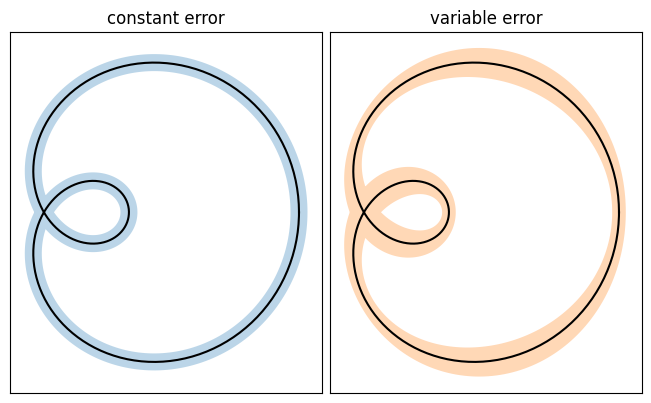

In [8]:
def draw_error_band(ax, x, y, err, **kwargs):
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]]) # x축 방향 법선 벡터 계산, 중심 차분 방식
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy) # 법선 벡터의 길이
    nx = dy / l
    ny = -dx / l

    # 오차범위의 끝점
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T # 다각형의 정점 계산
    codes = np.full(len(vertices), Path.LINETO) # 모든 정점에 대한 Path 코드 생성
    codes[0] = codes[len(xp)] = Path.MOVETO # 첫 번째 정점과 마지막 정점에 대한 Path 코드 MOVETO 설정
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs)) # 경로를 이용하여 PathPatch를 생성하고 축을 추가

_, axs = plt.subplots(1, 2, layout = 'constrained', sharex = True, sharey = True) # constrained: 축의 크기 동일
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title = title, aspect = 1, xticks = [], yticks = [])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err = err,
                    facecolor = f"C{i}", edgecolor = "none", alpha = .3)
    
plt.show()

법선 벡터는 주어진 곡선 또는 표면에 대해 수직인 방향을 나타내는 벡터입니다. 곡선이나 표면의 한 점에서 법선 벡터는 해당 점에서의 접선에 수직이며, 해당 점 주변 영역에서의 변화율과 관련이 있습니다. <br/>
<br/>

일반적으로 2차원 공간에서의 곡선에 대한 법선 벡터는 곡선의 접선에 대해 시계 방향으로 90도 회전한 벡터로 정의됩니다. 3차원 공간에서의 표면에 대한 법선 벡터는 해당 점에서의 표면의 경사도를 나타냅니다. 번선 벡터는 해당 점에서의 곡면의 기울기와 방향을 나타내는 중요한 정보입니다.